In [1]:
import os
current_dir = os.getcwd()
print(current_dir)


c:\Users\DeLL\Desktop\anything_py\modeldock\notebooks


In [2]:
import os
import sys

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(".."))

from src.m1_ingest_data import Ingestor
from src.m2_summarize_data import GetSummary
from src.m3_handle_missing_values import HandleMissingValues

In [3]:
file_path = os.path.join(current_dir, "..", "test_data", "archive.zip")
file_path = os.path.abspath(file_path)

In [4]:
ingestor = Ingestor()
df = ingestor.ingest(file_path)

In [5]:
summary = GetSummary(df)
report = summary.get_summary()

In [6]:
print(type(report))

<class 'dict'>


In [7]:
for content, section in report.items():
    print(f"{content} --> {section} \n")

Shape --> (2930, 82) 

Duplicate Rows --> 0 

Missing Values -->                 Missing Count
Order                       0
PID                         0
MS SubClass                 0
MS Zoning                   0
Lot Frontage              490
...                       ...
Mo Sold                     0
Yr Sold                     0
Sale Type                   0
Sale Condition              0
SalePrice                   0

[82 rows x 1 columns] 

Data Types -->                Data Type
Order              int64
PID                int64
MS SubClass        int64
MS Zoning         object
Lot Frontage     float64
...                  ...
Mo Sold            int64
Yr Sold            int64
Sale Type         object
Sale Condition    object
SalePrice          int64

[82 rows x 1 columns] 

Statistical Summary -->                  count unique     top  freq              mean  \
Order           2930.0    NaN     NaN   NaN            1465.5   
PID             2930.0    NaN     NaN   NaN  714464496.9

In [8]:
print("values before:", len(df.columns.tolist()))

values before: 82


Generating heatmap


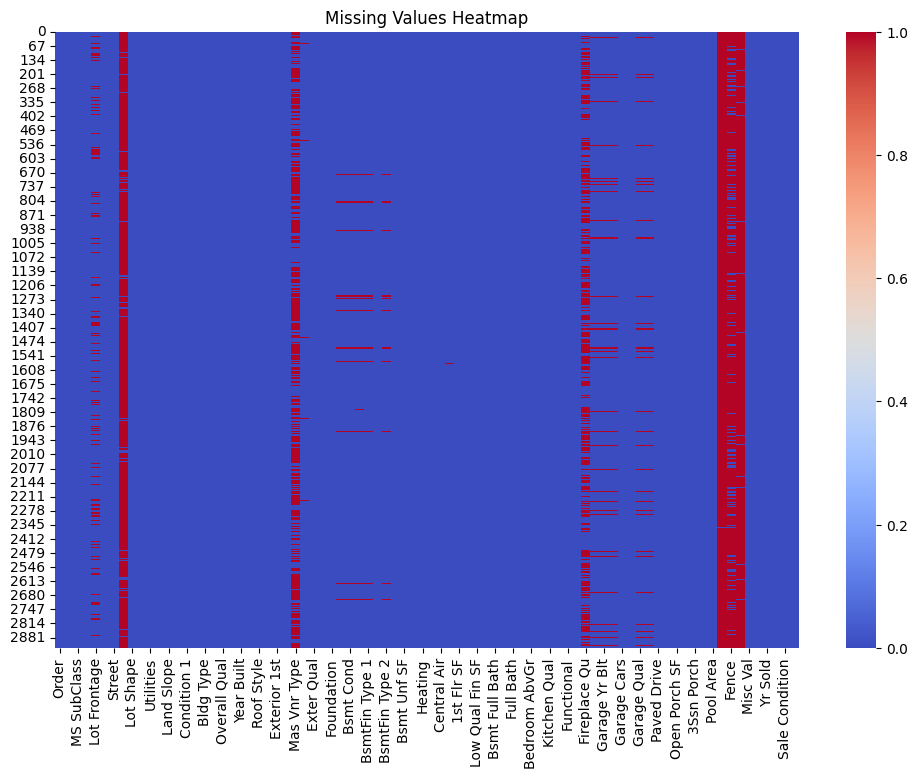

In [16]:
handle_missing_values = HandleMissingValues(df, axis=0, thresh=0)
handle_missing_values.analyze()


In [17]:
df = handle_missing_values.drop_null()

2025-06-27 18:27:34,497 - INFO - Dropping missing values with axis=0 and thresh=0
2025-06-27 18:27:34,508 - INFO - Missing values dropped.


In [19]:
print("values after:", len(df.columns.tolist()))

values after: 82
